In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import mysql.connector
from mysql.connector import Error
from datetime import datetime
import env

In [2]:
# Membaca data dari file CSV yang diunggah
credit_application = pd.read_csv('dataset/DATASET_CREDIT_APPLICATION.csv')

# Menampilkan 5 baris pertama dari tabel CREDIT_APPLICATION
credit_application.head()

,reco_id_curr,contract_type_name,gender,own_car_flag,own_realty_flag,children_count,income,loan_body,annuity_payment,goods_price,...,document_18_flag,document_19_flag,document_20_flag,document_21_flag,requests_bki_hour,requests_bki_day,requests_bki_week,requests_bki_month,requests_bki_qrt,requests_bki_year
0,250865db9679b963f8053cea33eb0f86,Cash loans,M,Y,N,0,180000.0,953460.0,66357.0,900000.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
1,73e474ce3790236a26bb05cc806b254d,Cash loans,F,N,N,0,85500.0,381528.0,14512.5,315000.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
2,bbead8b3dd56a68ac6744d0028aca009,Cash loans,M,Y,Y,0,405000.0,1006920.0,42660.0,900000.0,...,0,0,0,0,0.0,0.0,0.0,0.0,1.0,0.0
3,ece1f89b0bfae8748f44c138346ad267,Cash loans,F,N,Y,2,81000.0,286704.0,15682.5,247500.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
4,16a5efff61d95fd7f8de14d186a69c01,Cash loans,F,N,Y,2,99000.0,450000.0,30573.0,450000.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0


In [3]:
# Analisis awal pada tabel CREDIT_APPLICATION

# Ukuran tabel
shape = credit_application.shape

# Jumlah data yang hilang di setiap kolom
missing_data = credit_application.isnull().sum()

# Tipe data dari setiap kolom
data_types = credit_application.dtypes

# Deskripsi statistik dasar untuk kolom numerik
statistics = credit_application.describe()

# shape, missing_data[missing_data > 0], data_types, statistics

In [4]:
# Membaca data dari file CSV yang diunggah untuk tabel TARGET
target = pd.read_csv('dataset/DATASET_TARGET.csv')

# Menampilkan 5 baris pertama dari tabel TARGET
target.head()

,reco_id_curr,target
0,e0166010fe66a2657549fcf268d12191,0
1,b335548b6f64284f3a01a99ad6a20c87,0
2,704f72562168940fbfa7e9f01e0f84aa,0
3,02e086b1d018780e83983db8ad5996a3,0
4,16e41a0c7ed817b691e1895c0a7cef2a,0


In [5]:
# Analisis awal pada tabel TARGET

# Ukuran tabel
target_shape = target.shape

# Jumlah data yang hilang di setiap kolom
target_missing_data = target.isnull().sum()

# Tipe data dari setiap kolom
target_data_types = target.dtypes

# Distribusi dari kolom target
target_distribution = target['target'].value_counts(normalize=True)

target_shape, target_missing_data, target_data_types, target_distribution

((95964, 2),
 reco_id_curr    0
 target          0
 dtype: int64,
 reco_id_curr    object
 target           int64
 dtype: object,
 target
 0    0.921533
 1    0.078467
 Name: proportion, dtype: float64)

In [6]:
# Menggabungkan tabel CREDIT_APPLICATION dengan TARGET berdasarkan reco_id_curr
combined_data = pd.merge(credit_application, target, on='reco_id_curr', how='inner')

# Menampilkan 5 baris pertama dari dataset yang telah digabung
combined_data.head()

,reco_id_curr,contract_type_name,gender,own_car_flag,own_realty_flag,children_count,income,loan_body,annuity_payment,goods_price,...,document_19_flag,document_20_flag,document_21_flag,requests_bki_hour,requests_bki_day,requests_bki_week,requests_bki_month,requests_bki_qrt,requests_bki_year,target
0,250865db9679b963f8053cea33eb0f86,Cash loans,M,Y,N,0,180000.0,953460.0,66357.0,900000.0,...,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0,0
1,73e474ce3790236a26bb05cc806b254d,Cash loans,F,N,N,0,85500.0,381528.0,14512.5,315000.0,...,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0,0
2,bbead8b3dd56a68ac6744d0028aca009,Cash loans,M,Y,Y,0,405000.0,1006920.0,42660.0,900000.0,...,0,0,0,0.0,0.0,0.0,0.0,1.0,0.0,0
3,ece1f89b0bfae8748f44c138346ad267,Cash loans,F,N,Y,2,81000.0,286704.0,15682.5,247500.0,...,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0,0
4,16a5efff61d95fd7f8de14d186a69c01,Cash loans,F,N,Y,2,99000.0,450000.0,30573.0,450000.0,...,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0,1


In [7]:
# Statistik dasar untuk kolom days_employed
days_employed_stats = combined_data['days_employed'].describe()

# Jumlah data yang memiliki nilai days_employed di atas 0
days_employed_above_zero = combined_data[combined_data['days_employed'] > 0].shape[0]

# Memeriksa data yang memiliki days_employed yang tidak konsisten dengan days_birth
inconsistent_data = combined_data[combined_data['days_employed'] > -combined_data['days_birth']].shape[0]

days_employed_stats, days_employed_above_zero, inconsistent_data

(count     95964.000000
 mean      64266.267809
 std      141744.609096
 min      -17583.000000
 25%       -2874.000000
 50%       -1289.000000
 75%        -308.000000
 max      365243.000000
 Name: days_employed, dtype: float64,
 17417,
 17417)

<Axes: >

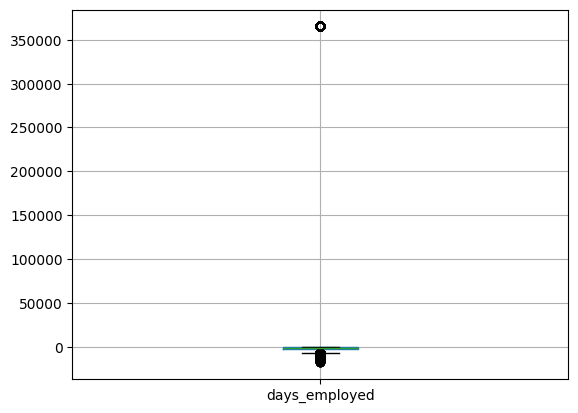

In [8]:
combined_data.boxplot(column=['days_employed'])

In [9]:
# Mengatur nilai days_employed yang tidak konsisten menjadi NaN
combined_data.loc[combined_data['days_employed'] > -combined_data['days_birth'], 'days_employed'] = np.nan

# Melakukan imputasi dengan median untuk days_employed
median_value = combined_data['days_employed'].median()
combined_data['days_employed'].fillna(median_value, inplace=True)

# Memeriksa kembali statistik dari kolom days_employed setelah imputasi
days_employed_stats_after_imputation = combined_data['days_employed'].describe()
days_employed_stats_after_imputation

count    95964.000000
mean     -2338.638646
std       2158.496679
min     -17583.000000
25%      -2874.000000
50%      -1736.000000
75%      -1001.000000
max         -3.000000
Name: days_employed, dtype: float64

In [10]:
# Pemeriksaan data yang hilang pada dataset saat ini
missing_data_combined = combined_data.isnull().sum()
missing_data_percentage = (missing_data_combined / len(combined_data)) * 100

# Menampilkan kolom dengan data yang hilang beserta persentasenya
missing_data_info = pd.DataFrame({
    'Missing Values': missing_data_combined,
    'Percentage (%)': missing_data_percentage
})

missing_data_info[missing_data_info['Missing Values'] > 0].sort_values(by='Percentage (%)', ascending=False)

,Missing Values,Percentage (%)
fondkapremon_mode,65688,68.450669
mode_walls_material,48876,50.931599
mode_house_type,48281,50.311575
emergency_state_mode,45608,47.526156
type_of_occupation,30235,31.506607
type_suite_name,267,0.278229


In [11]:
# Drop kolom dengan persentase data hilang di atas 60%
columns_to_drop = missing_data_info[missing_data_info['Percentage (%)'] > 60].index
combined_data.drop(columns=columns_to_drop, inplace=True)

# Imputasi dengan modus untuk kolom kategorikal dengan data yang hilang
categorical_columns_with_missing = missing_data_info[
    (missing_data_info['Percentage (%)'] > 0) & 
    (missing_data_info['Percentage (%)'] <= 60) & 
    (combined_data.dtypes == 'object')
].index

for col in categorical_columns_with_missing:
    mode_value = combined_data[col].mode()[0]
    combined_data[col].fillna(mode_value, inplace=True)

# Drop baris dengan data yang hilang untuk kolom dengan persentase data hilang yang kecil
combined_data.dropna(subset=['type_suite_name'], inplace=True)

# Memeriksa kembali data yang hilang setelah pembersihan
missing_data_after_cleaning = combined_data.isnull().sum().sum()
missing_data_after_cleaning


C:\Users\basnugroho\AppData\Local\Temp\ipykernel_284676\2883124500.py:6: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  categorical_columns_with_missing = missing_data_info[


0

In [12]:
# Pemeriksaan data yang hilang pada dataset saat ini
missing_data_combined = combined_data.isnull().sum()
missing_data_percentage = (missing_data_combined / len(combined_data)) * 100

# Menampilkan kolom dengan data yang hilang beserta persentasenya
missing_data_info = pd.DataFrame({
    'Missing Values': missing_data_combined,
    'Percentage (%)': missing_data_percentage
})

missing_data_info[missing_data_info['Missing Values'] > 0].sort_values(by='Percentage (%)', ascending=False)

,Missing Values,Percentage (%)


In [14]:
# Memeriksa distribusi dari kolom dengan awalan "document_"
document_columns = [col for col in combined_data.columns if col.startswith("document_")]
document_distribution = combined_data[document_columns].sum() / len(combined_data) * 100

document_distribution.sort_values()

document_2_flag      0.000000
document_12_flag     0.000000
document_10_flag     0.001042
document_4_flag      0.009379
document_7_flag      0.012505
document_17_flag     0.014589
document_21_flag     0.021883
document_20_flag     0.032304
document_19_flag     0.034388
document_15_flag     0.087533
document_11_flag     0.145888
document_14_flag     0.178192
document_13_flag     0.214664
document_9_flag      0.367846
document_18_flag     0.476220
document_16_flag     0.595015
document_5_flag      1.555792
document_8_flag      8.075945
document_6_flag      8.618857
document_3_flag     71.971781
dtype: float64

In [15]:
# Menghapus kolom dengan distribusi yang sangat condong ke satu nilai
threshold = 1  # Menghapus kolom dengan persentase kurang dari 1%
columns_to_drop = document_distribution[document_distribution < threshold].index
combined_data.drop(columns=columns_to_drop, inplace=True)

# Memeriksa ulang kolom dengan awalan "document_" yang masih ada di dataset
remaining_document_columns = [col for col in combined_data.columns if col.startswith("document_")]
remaining_document_columns

['document_3_flag', 'document_5_flag', 'document_6_flag', 'document_8_flag']

#### periksa outliers

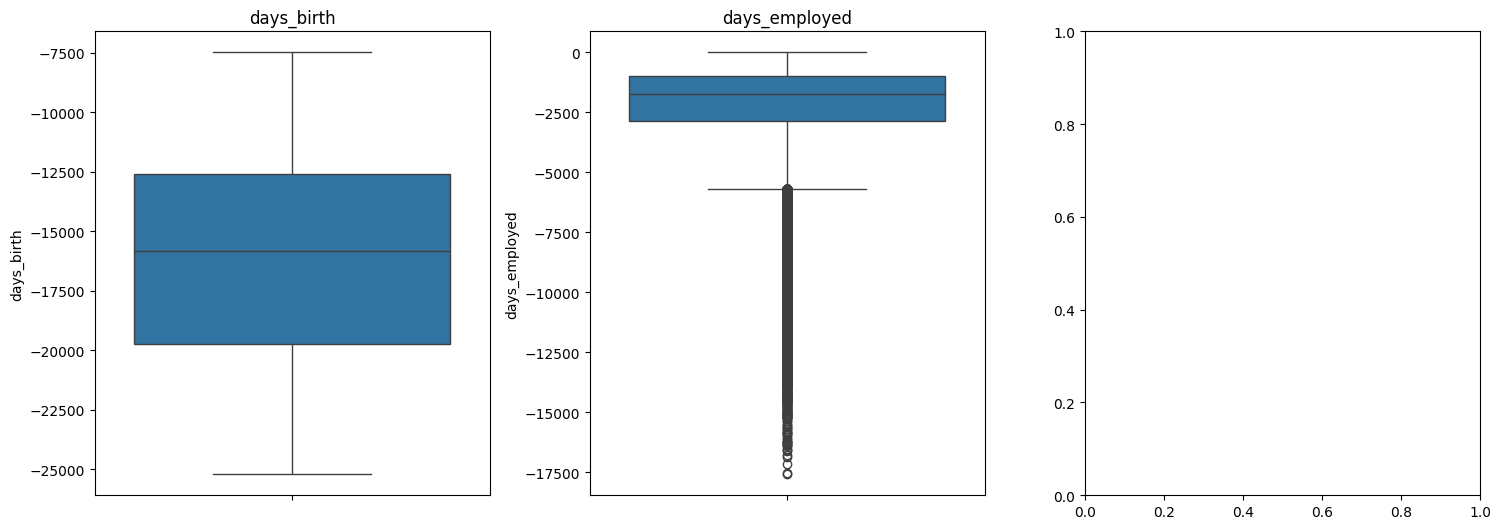

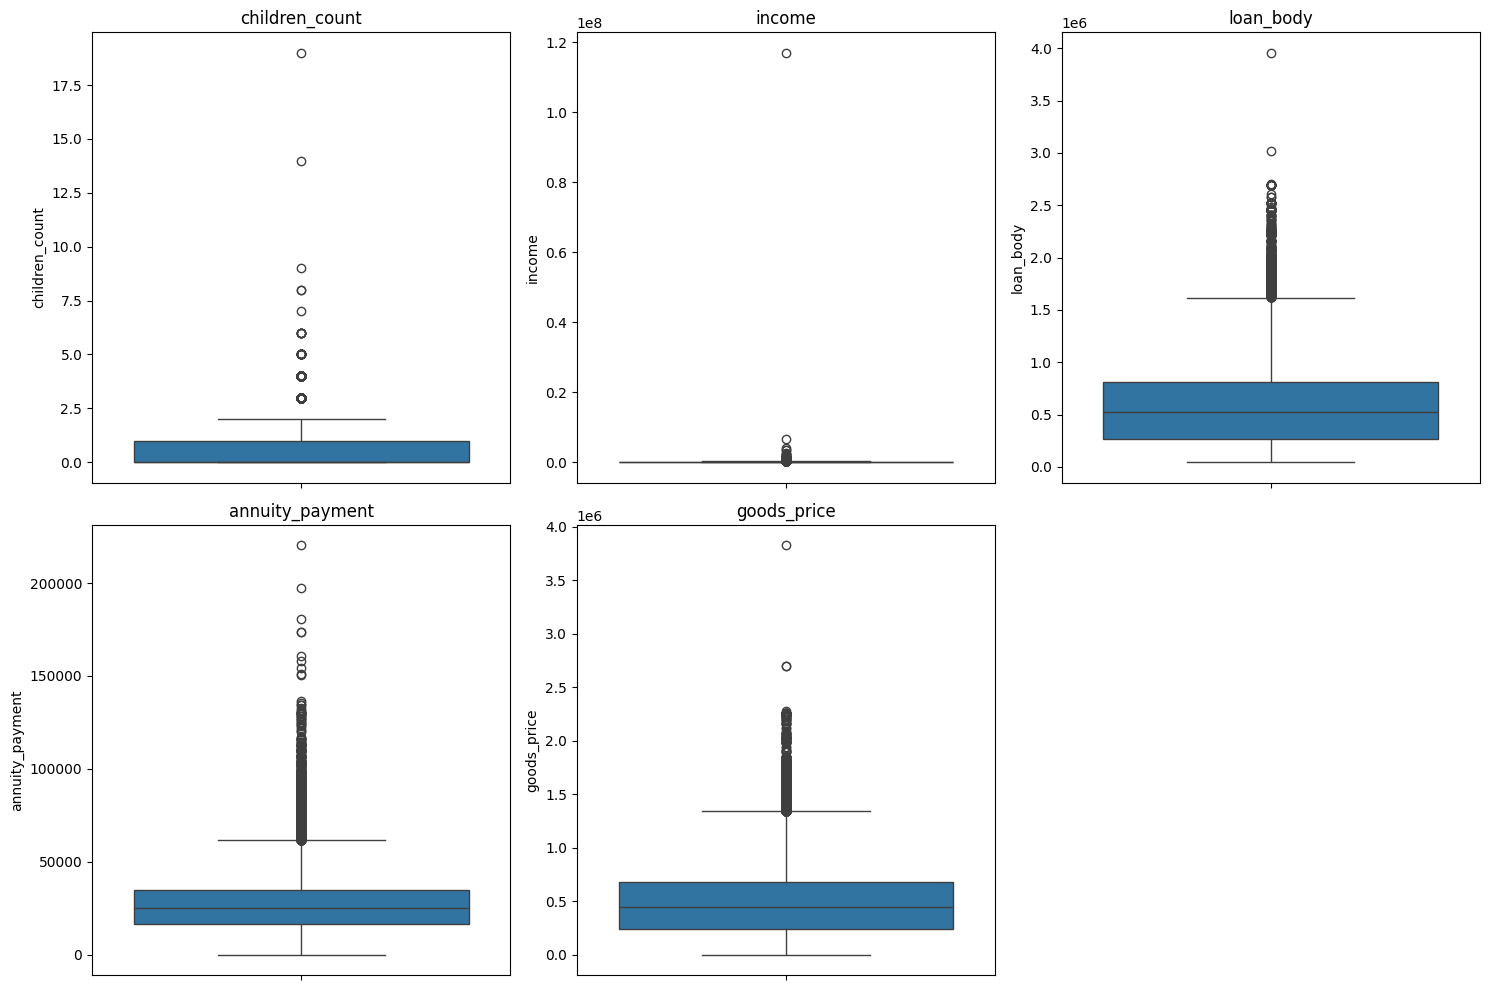

In [17]:
# Memeriksa kolom numerik yang tersedia di dataset
numeric_columns = combined_data.select_dtypes(include=['float64', 'int64']).columns

# Memilih beberapa kolom numerik pertama untuk divisualisasikan
selected_columns = numeric_columns[:5]

plt.figure(figsize=(15, 10))

# Membuat boxplot untuk setiap kolom terpilih
for i, col in enumerate(selected_columns, 1):
    plt.subplot(2, 3, i)
    sns.boxplot(y=combined_data[col])
    plt.title(col)
    plt.tight_layout()

plt.show()


In [18]:
# Statistik dasar untuk days_employed
days_employed_stats = combined_data['days_employed'].describe()

# Menghitung IQR untuk days_employed
Q1 = days_employed_stats['25%']
Q3 = days_employed_stats['75%']
IQR = Q3 - Q1

# Menghitung batas atas dan bawah untuk outliers
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Mengidentifikasi jumlah dan proporsi data yang dianggap sebagai outliers
outliers = combined_data[(combined_data['days_employed'] < lower_bound) | (combined_data['days_employed'] > upper_bound)]
outliers_count = outliers.shape[0]
outliers_percentage = (outliers_count / len(combined_data)) * 100

days_employed_stats, lower_bound, upper_bound, outliers_count, outliers_percentage


(count    95964.000000
 mean     -2338.638646
 std       2158.496679
 min     -17583.000000
 25%      -2874.000000
 50%      -1736.000000
 75%      -1001.000000
 max         -3.000000
 Name: days_employed, dtype: float64,
 -5683.5,
 1808.5,
 7119,
 7.418406902588471)

In [19]:
# Fungsi untuk menghitung batas atas dan bawah serta mengidentifikasi outliers untuk setiap kolom numerik
def identify_outliers(column):
    Q1 = column.quantile(0.25)
    Q3 = column.quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    
    outliers = column[(column < lower_bound) | (column > upper_bound)]
    return len(outliers), lower_bound, upper_bound

# Mengidentifikasi outliers untuk setiap kolom numerik
outliers_info = {}
for col in numeric_columns:
    count, lower, upper = identify_outliers(combined_data[col])
    percentage = (count / len(combined_data)) * 100
    outliers_info[col] = {'Outliers Count': count, 'Percentage (%)': percentage, 'Lower Bound': lower, 'Upper Bound': upper}

# Mengkonversi informasi outliers ke DataFrame untuk tampilan yang lebih baik
outliers_df = pd.DataFrame(outliers_info).transpose()

# Menampilkan informasi outliers untuk setiap kolom numerik
outliers_df.sort_values(by='Percentage (%)', ascending=False)

,Outliers Count,Percentage (%),Lower Bound,Upper Bound
rating_client_region,24639.0,25.675253,2.00000,2.00000
rating_client_w_city_region,23903.0,24.908299,2.00000,2.00000
non_living_area_medi,23803.0,24.804093,0.00000,0.00000
non_living_area_avg,22679.0,23.632821,-0.00135,0.00225
non_living_area_mode,21930.0,22.852320,0.00000,0.00000
...,...,...,...,...
median_years_building,0.0,0.000000,-1.03710,1.72850
publication_timestamp,0.0,0.000000,-8074.50000,1937.50000
mobile_flag,0.0,0.000000,1.00000,1.00000
phone_flag,0.0,0.000000,-1.50000,2.50000


In [20]:
# Menampilkan kolom dengan persentase outliers di atas 10%
high_outliers_columns = outliers_df[outliers_df['Percentage (%)'] > 10]
high_outliers_columns


,Outliers Count,Percentage (%),Lower Bound,Upper Bound
employee_phone_flag,17423.0,18.155767,1.00000,1.00000
work_phone_flag,18900.0,19.694886,0.00000,0.00000
rating_client_region,24639.0,25.675253,2.00000,2.00000
rating_client_w_city_region,23903.0,24.908299,2.00000,2.00000
not_work_city_reg_city,21778.0,22.693927,0.00000,0.00000
living_city_not_work_city_flag,17152.0,17.873369,0.00000,0.00000
average_commonarea,19942.0,20.780709,-0.00585,0.00975
average_elevator_count,17691.0,18.435038,0.00000,0.00000
average_min_floors,20418.0,21.276729,-0.12495,0.20825
average_land_area,9826.0,10.239256,-0.05085,0.08475


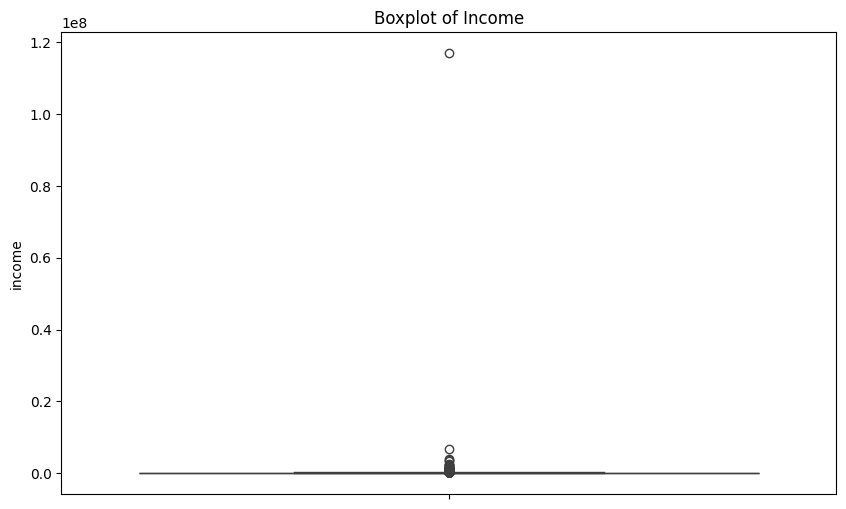

(count    9.596400e+04
 mean     1.702946e+05
 std      3.892335e+05
 min      2.700000e+04
 25%      1.125000e+05
 50%      1.575000e+05
 75%      2.025000e+05
 max      1.170000e+08
 Name: income, dtype: float64,
 -22500.0,
 337500.0,
 4232,
 4.409987078487767)

In [21]:
# Membuat boxplot untuk kolom 'income'
plt.figure(figsize=(10, 6))
sns.boxplot(y=combined_data['income'])
plt.title('Boxplot of Income')
plt.show()

# Menghitung statistik dasar dan IQR untuk kolom 'income'
income_stats = combined_data['income'].describe()
Q1 = income_stats['25%']
Q3 = income_stats['75%']
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Mengidentifikasi jumlah dan proporsi data yang dianggap sebagai outliers
outliers = combined_data[(combined_data['income'] < lower_bound) | (combined_data['income'] > upper_bound)]
outliers_count = outliers.shape[0]
outliers_percentage = (outliers_count / len(combined_data)) * 100

income_stats, lower_bound, upper_bound, outliers_count, outliers_percentage

In [22]:
### Add next column

In [23]:
# Membaca data dari tabel BKI
bki_data = pd.read_csv('eda/DATASET_BKI.csv')

# Melihat 5 baris pertama dari tabel BKI
bki_data.head()


,Unnamed: 0,reco_id_curr,reco_bureau_id,credit_status,credit_currency,days_credit,credit_day_overdue,days_credit_enddate,days_enddate_fact,credit_limit_max_overdue,credit_prolong_count,credit_sum,credit_sum_debt,credit_sum_limit,credit_sum_overdue,credit_type,days_credit_update,annuity_payment
0,0,b515d1bb1b87fac7af206c651d13b9be,9356630c6f2f6ef58d397e6627ef4fee,Active,currency 1,-96,0,269.0,0.0,0.0,0,89910.0,76905.0,0.0,0.0,Consumer credit,-22,0.0
1,1,33f209cac03609d8ae3469145b95701b,fc581f14fd9c519e2fbd00a08229090e,Closed,currency 1,-2413,0,-1864.0,-2128.0,0.0,0,180000.0,0.0,0.0,0.0,Consumer credit,-708,0.0
2,2,33f209cac03609d8ae3469145b95701b,bc79663e86a6a2a5dd4ef13bb3e8bc6b,Active,currency 1,-941,0,-17.0,0.0,0.0,0,40500.0,0.0,0.0,0.0,Credit card,-15,0.0
3,3,33f209cac03609d8ae3469145b95701b,e0d22e24eee260400bdd0cede69521d9,Closed,currency 1,-1110,0,-745.0,-727.0,0.0,0,114728.0,0.0,0.0,0.0,Consumer credit,-658,0.0
4,4,33f209cac03609d8ae3469145b95701b,92649700b347f0ebb2b5ab061dd08059,Closed,currency 1,-2133,0,-1038.0,-1127.0,0.0,0,225000.0,0.0,0.0,0.0,Consumer credit,-708,0.0


In [24]:
# Memeriksa informasi dasar dari tabel BKI
bki_info = bki_data.info()

# Memeriksa jumlah data hilang untuk setiap kolom
missing_values = bki_data.isnull().sum()

bki_info, missing_values


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 338866 entries, 0 to 338865
Data columns (total 18 columns):
 #   Column                    Non-Null Count   Dtype  
---  ------                    --------------   -----  
 0   Unnamed: 0                338866 non-null  int64  
 1   reco_id_curr              338866 non-null  object 
 2   reco_bureau_id            338866 non-null  object 
 3   credit_status             338866 non-null  object 
 4   credit_currency           338866 non-null  object 
 5   days_credit               338866 non-null  int64  
 6   credit_day_overdue        338866 non-null  int64  
 7   days_credit_enddate       338866 non-null  float64
 8   days_enddate_fact         338866 non-null  float64
 9   credit_limit_max_overdue  338866 non-null  float64
 10  credit_prolong_count      338866 non-null  int64  
 11  credit_sum                338866 non-null  float64
 12  credit_sum_debt           338866 non-null  float64
 13  credit_sum_limit          338866 non-null  f

(None,
 Unnamed: 0                  0
 reco_id_curr                0
 reco_bureau_id              0
 credit_status               0
 credit_currency             0
 days_credit                 0
 credit_day_overdue          0
 days_credit_enddate         0
 days_enddate_fact           0
 credit_limit_max_overdue    0
 credit_prolong_count        0
 credit_sum                  0
 credit_sum_debt             0
 credit_sum_limit            0
 credit_sum_overdue          0
 credit_type                 0
 days_credit_update          0
 annuity_payment             0
 dtype: int64)

In [25]:
# Menghapus kolom 'Unnamed: 0'
bki_data.drop(columns='Unnamed: 0', inplace=True)

# Memeriksa statistik dasar untuk kolom numerik di tabel BKI
numeric_stats = bki_data.describe()

# Memeriksa distribusi untuk beberapa kolom kategorikal utama
categorical_distributions = {}
categorical_columns = ['credit_status', 'credit_currency', 'credit_type']
for col in categorical_columns:
    categorical_distributions[col] = bki_data[col].value_counts()

numeric_stats, categorical_distributions

(         days_credit  credit_day_overdue  days_credit_enddate  \
 count  338866.000000        338866.00000        338866.000000   
 mean    -1140.075304             0.95034           437.351773   
 std       799.381575            40.17249          4843.039939   
 min     -2922.000000             0.00000        -42060.000000   
 25%     -1663.000000             0.00000         -1089.000000   
 50%      -985.000000             0.00000          -268.000000   
 75%      -469.000000             0.00000           330.000000   
 max         0.000000          2792.00000         31198.000000   
 
        days_enddate_fact  credit_limit_max_overdue  credit_prolong_count  \
 count      338866.000000              3.388660e+05         338866.000000   
 mean         -643.608943              1.182476e+03              0.007144   
 std           750.419832              3.712291e+04              0.101828   
 min         -2919.000000              0.000000e+00              0.000000   
 25%         -1084.

In [26]:
# Memeriksa jumlah baris yang duplikat di tabel BKI
duplicate_rows = bki_data.duplicated().sum()

# Jika ada duplikasi, kita akan menampilkan beberapa baris yang duplikat sebagai contoh
duplicate_examples = bki_data[bki_data.duplicated(keep=False)].head(10) if duplicate_rows > 0 else None

duplicate_rows, duplicate_examples


(0, None)

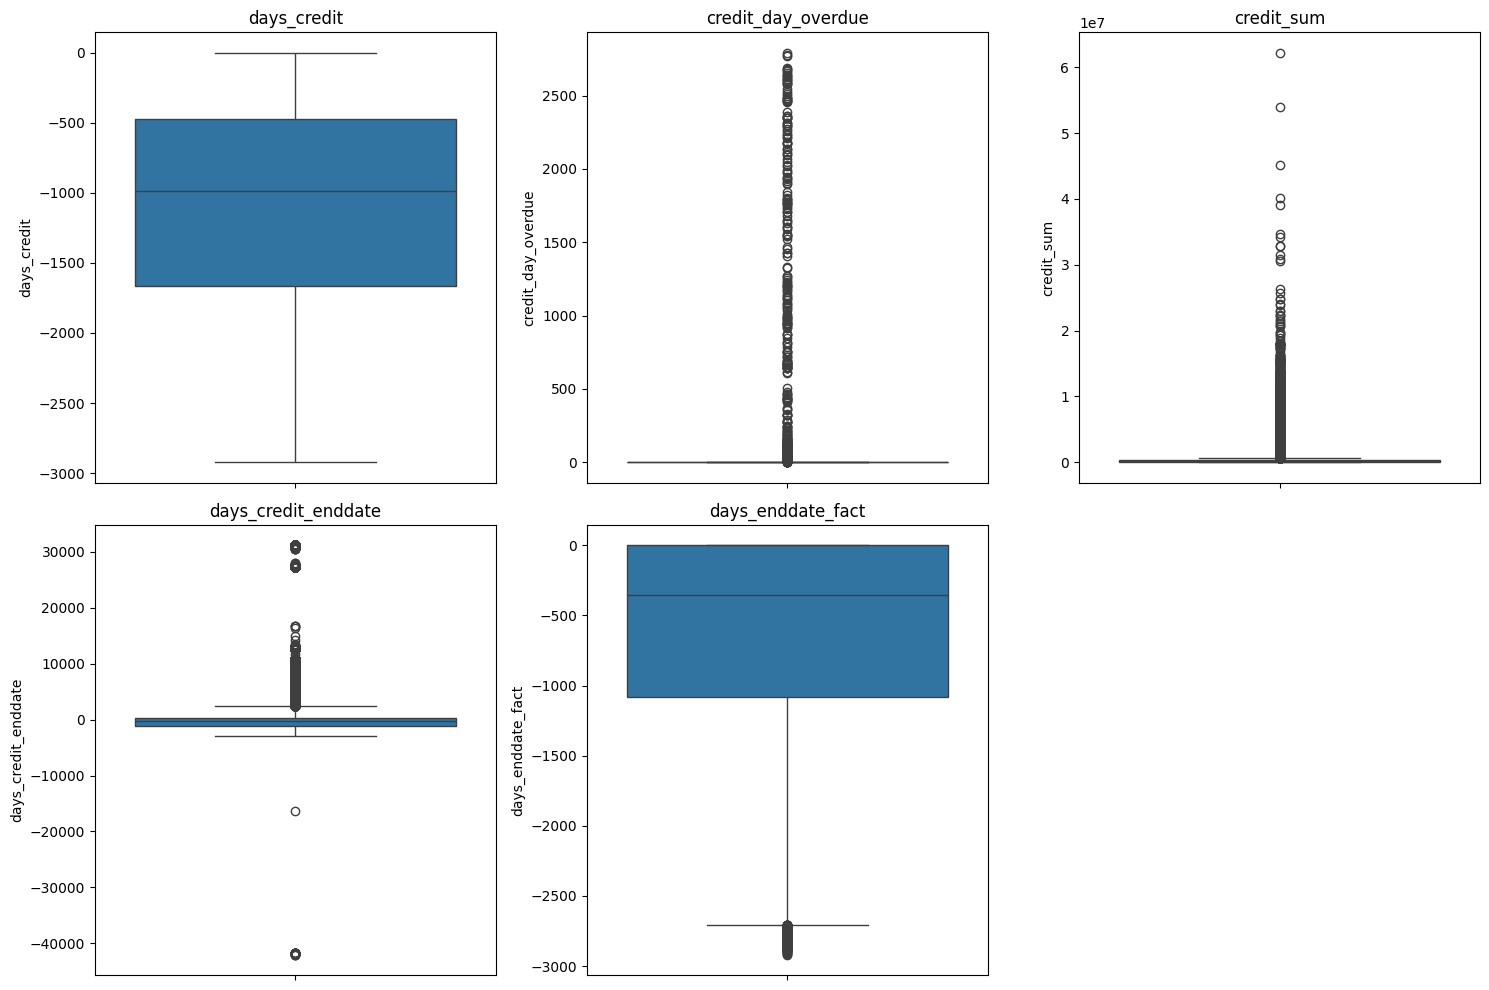

In [27]:
# Memilih beberapa kolom numerik untuk divisualisasikan
selected_bki_columns = ['days_credit', 'credit_day_overdue', 'credit_sum', 'days_credit_enddate', 'days_enddate_fact']

plt.figure(figsize=(15, 10))

# Membuat boxplot untuk setiap kolom terpilih
for i, col in enumerate(selected_bki_columns, 1):
    plt.subplot(2, 3, i)
    sns.boxplot(y=bki_data[col])
    plt.title(col)
    plt.tight_layout()

plt.show()


In [28]:
# Fungsi untuk menghitung dan mengidentifikasi outliers
def compute_outliers_info(column):
    Q1 = column.quantile(0.25)
    Q3 = column.quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    outliers = column[(column < lower_bound) | (column > upper_bound)]
    return len(outliers), lower_bound, upper_bound, (len(outliers) / len(column)) * 100

# Menghitung informasi outliers untuk kolom 'credit_day_overdue' dan 'credit_sum'
outliers_overdue = compute_outliers_info(bki_data['credit_day_overdue'])
outliers_sum = compute_outliers_info(bki_data['credit_sum'])

outliers_info = {
    'credit_day_overdue': {
        'Outliers Count': outliers_overdue[0],
        'Lower Bound': outliers_overdue[1],
        'Upper Bound': outliers_overdue[2],
        'Percentage (%)': outliers_overdue[3]
    },
    'credit_sum': {
        'Outliers Count': outliers_sum[0],
        'Lower Bound': outliers_sum[1],
        'Upper Bound': outliers_sum[2],
        'Percentage (%)': outliers_sum[3]
    }
}

outliers_info_df = pd.DataFrame(outliers_info).transpose()
outliers_info_df


,Outliers Count,Lower Bound,Upper Bound,Percentage (%)
credit_day_overdue,800.0,0.00,0.00,0.236082
credit_sum,40093.0,-282183.75,601310.25,11.831520


In [29]:
# Membuat fitur agregat dari tabel BKI
aggregated_features = {
    'reco_bureau_id': ['count'],
    'credit_sum': ['mean', 'sum', 'max'],
    'credit_day_overdue': ['mean', 'max'],
    'credit_type': ['nunique'],
    'days_credit': ['mean', 'min', 'max'],
    'days_credit_enddate': ['mean', 'min', 'max'],
    'days_enddate_fact': ['mean', 'min', 'max']
}

# Agregasi data berdasarkan reco_id_curr
bki_aggregated = bki_data.groupby('reco_id_curr').agg(aggregated_features)
bki_aggregated.columns = ['_'.join(col).strip() for col in bki_aggregated.columns.values]
bki_aggregated.reset_index(inplace=True)

# Menghitung jumlah kredit yang masih "Active" per reco_id_curr
bki_aggregated['active_loans_count'] = bki_data[bki_data['credit_status'] == 'Active'].groupby('reco_id_curr').size()
bki_aggregated['active_loans_count'].fillna(0, inplace=True)

# Menggabungkan fitur agregat dengan dataset utama
combined_data_aggregated = pd.merge(combined_data, bki_aggregated, on='reco_id_curr', how='left')

# Mengisi NaN dengan 0 untuk kolom yang baru ditambahkan
new_columns = bki_aggregated.columns[1:]
combined_data_aggregated[new_columns] = combined_data_aggregated[new_columns].fillna(0)

# Menampilkan 5 baris pertama dari dataset yang telah digabungkan
combined_data_aggregated.head()


,reco_id_curr,contract_type_name,gender,own_car_flag,own_realty_flag,children_count,income,loan_body,annuity_payment,goods_price,...,days_credit_mean,days_credit_min,days_credit_max,days_credit_enddate_mean,days_credit_enddate_min,days_credit_enddate_max,days_enddate_fact_mean,days_enddate_fact_min,days_enddate_fact_max,active_loans_count
0,250865db9679b963f8053cea33eb0f86,Cash loans,M,Y,N,0,180000.0,953460.0,66357.0,900000.0,...,-1168.0,-1168.0,-1168.0,-437.0,-437.0,-437.0,-437.0,-437.0,-437.0,0.0
1,73e474ce3790236a26bb05cc806b254d,Cash loans,F,N,N,0,85500.0,381528.0,14512.5,315000.0,...,-479.5,-694.0,-265.0,1894.5,831.0,2958.0,0.0,0.0,0.0,0.0
2,bbead8b3dd56a68ac6744d0028aca009,Cash loans,M,Y,Y,0,405000.0,1006920.0,42660.0,900000.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,ece1f89b0bfae8748f44c138346ad267,Cash loans,F,N,Y,2,81000.0,286704.0,15682.5,247500.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,16a5efff61d95fd7f8de14d186a69c01,Cash loans,F,N,Y,2,99000.0,450000.0,30573.0,450000.0,...,-245.0,-303.0,-71.0,15620.5,0.0,31094.0,0.0,0.0,0.0,0.0


In [30]:
# Memeriksa jumlah data hilang untuk setiap kolom di dataset yang telah digabungkan
missing_values_aggregated = combined_data_aggregated.isnull().sum()
missing_percentage_aggregated = (missing_values_aggregated / len(combined_data_aggregated)) * 100

missing_data = pd.DataFrame({
    'Missing Values': missing_values_aggregated,
    'Percentage (%)': missing_percentage_aggregated
})

# Menyaring kolom dengan data hilang
missing_data = missing_data[missing_data['Missing Values'] > 0].sort_values(by='Percentage (%)', ascending=False)

missing_data


,Missing Values,Percentage (%)


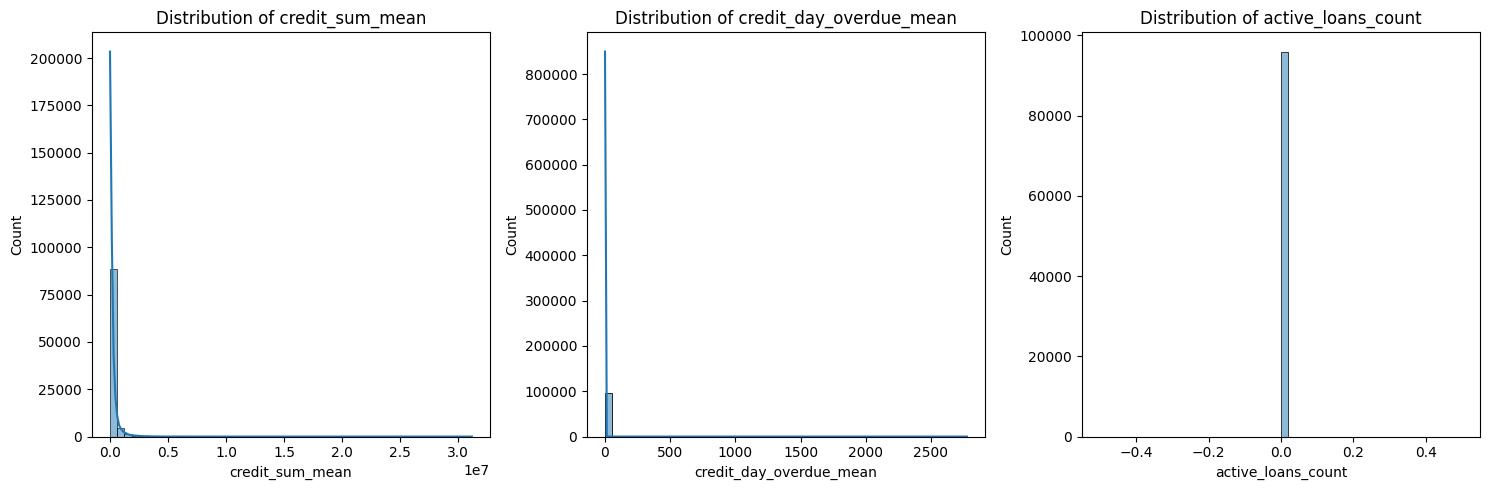

In [32]:
# Memilih beberapa fitur baru untuk divisualisasikan
selected_aggregated_columns = ['credit_sum_mean', 'credit_day_overdue_mean', 'active_loans_count']

plt.figure(figsize=(15, 5))

# Membuat histogram untuk setiap fitur terpilih
for i, col in enumerate(selected_aggregated_columns, 1):
    plt.subplot(1, 3, i)
    sns.histplot(combined_data_aggregated[col], bins=50, kde=True)
    plt.title(f'Distribution of {col}')
    plt.tight_layout()

plt.show()

In [33]:
# Memeriksa jumlah baris yang duplikat di dataset yang telah digabungkan
duplicate_rows_aggregated = combined_data_aggregated.duplicated().sum()

duplicate_rows_aggregated


0

In [34]:
# Menghitung informasi outliers untuk fitur baru dari tabel BKI
outliers_credit_sum_mean = compute_outliers_info(combined_data_aggregated['credit_sum_mean'])
outliers_credit_day_overdue_mean = compute_outliers_info(combined_data_aggregated['credit_day_overdue_mean'])
outliers_active_loans_count = compute_outliers_info(combined_data_aggregated['active_loans_count'])

outliers_info_new = {
    'credit_sum_mean': {
        'Outliers Count': outliers_credit_sum_mean[0],
        'Lower Bound': outliers_credit_sum_mean[1],
        'Upper Bound': outliers_credit_sum_mean[2],
        'Percentage (%)': outliers_credit_sum_mean[3]
    },
    'credit_day_overdue_mean': {
        'Outliers Count': outliers_credit_day_overdue_mean[0],
        'Lower Bound': outliers_credit_day_overdue_mean[1],
        'Upper Bound': outliers_credit_day_overdue_mean[2],
        'Percentage (%)': outliers_credit_day_overdue_mean[3]
    },
    'active_loans_count': {
        'Outliers Count': outliers_active_loans_count[0],
        'Lower Bound': outliers_active_loans_count[1],
        'Upper Bound': outliers_active_loans_count[2],
        'Percentage (%)': outliers_active_loans_count[3]
    }
}

outliers_info_new_df = pd.DataFrame(outliers_info_new).transpose()
outliers_info_new_df


,Outliers Count,Lower Bound,Upper Bound,Percentage (%)
credit_sum_mean,7703.0,-356818.83,594698.05,8.026968
credit_day_overdue_mean,763.0,0.00,0.00,0.795090
active_loans_count,0.0,0.00,0.00,0.000000


#### Tabel yang sudah digabung:
- CREDIT_APPLICATION: Tabel utama yang berisi informasi aplikasi kredit.
- TARGET: Tabel yang berisi target klasifikasi (apakah aplikasi pinjaman berhasil atau tidak).
- Fitur agregat dari BKI: Tabel yang berisi informasi riwayat kredit klien.

In [35]:
combined_data_aggregated.head()

,reco_id_curr,contract_type_name,gender,own_car_flag,own_realty_flag,children_count,income,loan_body,annuity_payment,goods_price,...,days_credit_mean,days_credit_min,days_credit_max,days_credit_enddate_mean,days_credit_enddate_min,days_credit_enddate_max,days_enddate_fact_mean,days_enddate_fact_min,days_enddate_fact_max,active_loans_count
0,250865db9679b963f8053cea33eb0f86,Cash loans,M,Y,N,0,180000.0,953460.0,66357.0,900000.0,...,-1168.0,-1168.0,-1168.0,-437.0,-437.0,-437.0,-437.0,-437.0,-437.0,0.0
1,73e474ce3790236a26bb05cc806b254d,Cash loans,F,N,N,0,85500.0,381528.0,14512.5,315000.0,...,-479.5,-694.0,-265.0,1894.5,831.0,2958.0,0.0,0.0,0.0,0.0
2,bbead8b3dd56a68ac6744d0028aca009,Cash loans,M,Y,Y,0,405000.0,1006920.0,42660.0,900000.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,ece1f89b0bfae8748f44c138346ad267,Cash loans,F,N,Y,2,81000.0,286704.0,15682.5,247500.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,16a5efff61d95fd7f8de14d186a69c01,Cash loans,F,N,Y,2,99000.0,450000.0,30573.0,450000.0,...,-245.0,-303.0,-71.0,15620.5,0.0,31094.0,0.0,0.0,0.0,0.0


In [41]:
combined_data_aggregated['target'].value_counts()

target
0    88434
1     7530
Name: count, dtype: int64

In [43]:
dataset_b_final_cleaned_df = pd.read_csv('eda/dataset_b_final_cleaned.csv')
dataset_b_final_cleaned_df.shape

(372960, 13)

In [44]:
combined_data_aggregated.shape

(95964, 122)

In [45]:
target.shape

(95964, 2)

In [47]:
for col in combined_data_aggregated.isnull():
    print(col)

reco_id_curr
contract_type_name
gender
own_car_flag
own_realty_flag
children_count
income
loan_body
annuity_payment
goods_price
type_suite_name
income_type_name
education_type_name
family_status_name
housing_type_name
population_relative_region
days_birth
days_employed
registration_timestamp
publication_timestamp
age_own_car
mobile_flag
employee_phone_flag
work_phone_flag
mobile_contact_flag
phone_flag
email_flag
type_of_occupation
family_members__count
rating_client_region
rating_client_w_city_region
start_weekday_appr_process
hour_of_approval_process_start
not_live_region_reg_region
not_work_region_reg_region
living_region_not_work_region_flag
not_live_city_reg_city
not_work_city_reg_city
living_city_not_work_city_flag
type_of_organization
external_source_1
external_source_2
external_source_3
average_apartments
average_basementarea
average_years_beginexpluatation
average_years_building
average_commonarea
average_elevator_count
average_entrance_count
average_max_floors
average_min_flo

In [49]:
with open('combined_data_aggregated.csv', 'w') as f:
    f.write(f'column, na_count\n')
    for col in combined_data_aggregated.columns:
        f.write(f"{col}, {combined_data_aggregated[col].isna().sum()}\n")
    f.close()